In [1]:
import torch
import transformers

import torchtrail

/Users/arakhmati/github/torchtrail/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


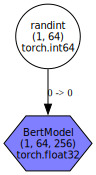

In [2]:
model_name = "google/bert_uncased_L-4_H-256_A-4"
config = transformers.BertConfig.from_pretrained(model_name)
config.num_hidden_layers = 1
model = transformers.BertModel.from_pretrained(model_name, config=config).eval()

with torchtrail.trace():
    input_tensor = torch.randint(0, model.config.vocab_size, (1, 64))
    output = model(input_tensor).last_hidden_state

torchtrail.visualize(output, max_depth=1)

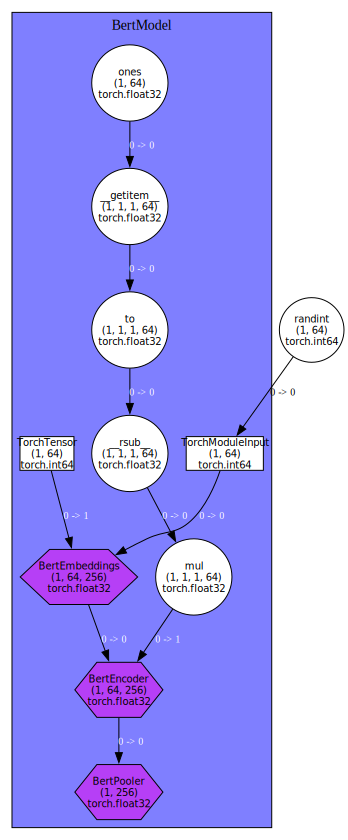

In [3]:
torchtrail.visualize(output, max_depth=2)

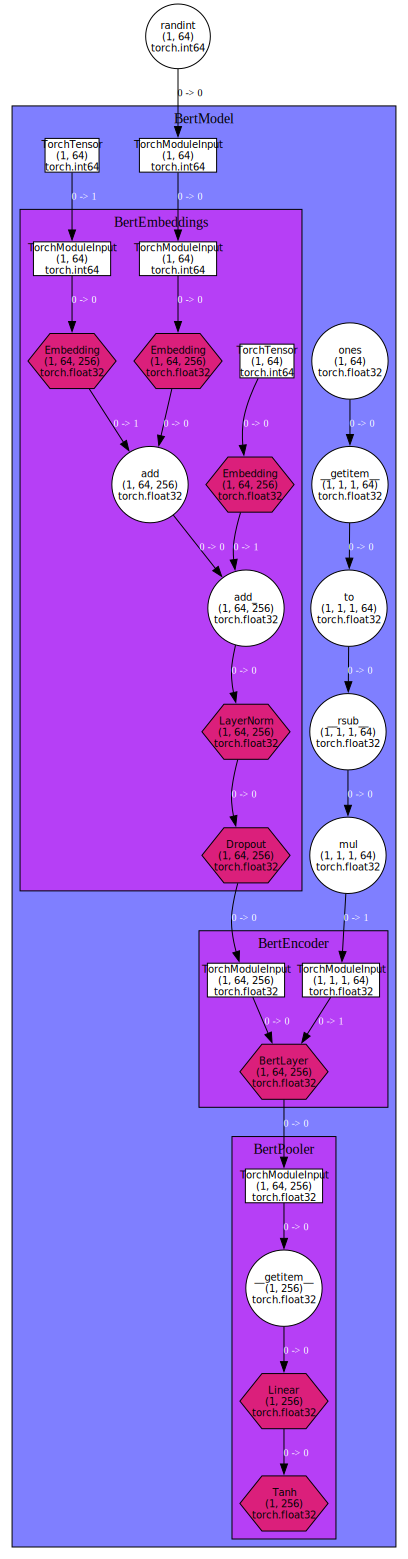

In [4]:
torchtrail.visualize(output, max_depth=3)

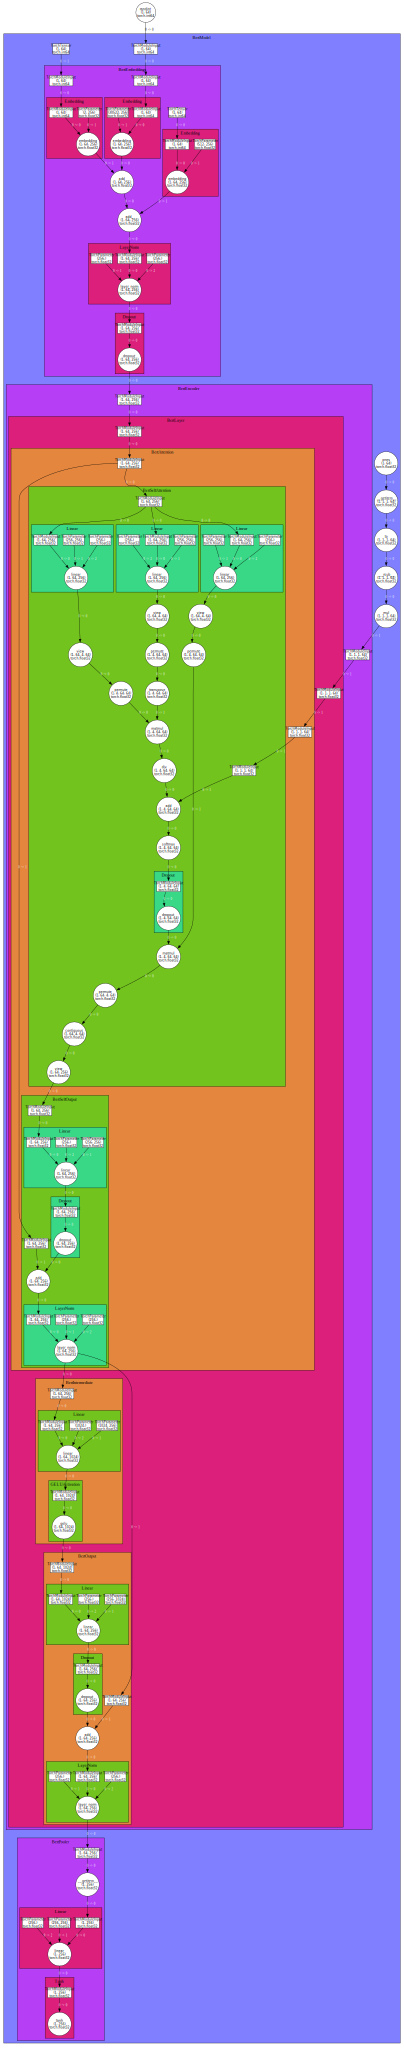

In [5]:
torchtrail.visualize(output)